In [161]:
import numpy as np  # For numerical operations and array handling
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations using Matplotlib
import plotly.express as px  # For creating interactive visualizations with Plotly
import pandas as pd  # (Duplicate import, can be removed to avoid redundancy)

from sklearn.datasets import make_classification  # For generating synthetic classification datasets

In [235]:
# Generate synthetic classification dataset with specified parameters
features, targets = make_classification(
    n_samples=130,  # Total number of data points (samples)
    n_features=2,   # Number of features for each sample
    n_informative=1,  # Number of features that are actually informative
    n_redundant=0,  # Number of redundant features (none in this case)
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=100  # Seed for reproducibility
)

# Create a DataFrame to organize and label the data
df = pd.DataFrame(data=features, columns=['x1', 'x2'])  # Assign feature names 'x1' and 'x2'
df['targets'] = targets  # Add the target class labels to the DataFrame
df.head()  # Display the first few rows of the DataFrame for verification

,x1,x2,targets
0,-0.157265,-0.937113,0
1,-0.016345,-0.568249,0
2,-0.008899,-0.918727,0
3,1.296263,-0.564096,0
4,0.702185,1.114215,1


In [236]:
# Print the shape (dimensions) of the features array
print("Shape of features: ", features.shape)  # Output format: (rows, columns)

# Print the shape (dimensions) of the targets array
print("Shape of targets: ", targets.shape)  # Output format: (length,)

# Print the class distribution of the targets
print("Class distribution of targets: ", np.bincount(targets))  # Count of samples for each class (0 and 1)

Shape of features:  (130, 2)
Shape of targets:  (130,)
Class distribution of targets:  [64 66]


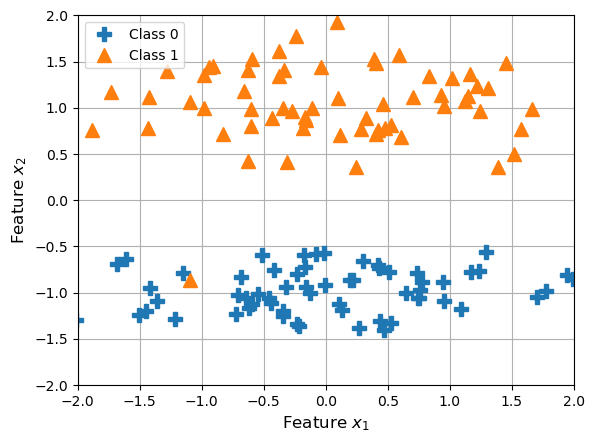

In [237]:
# Plot points for Class 0 with custom marker and size
plt.plot(
    features[targets == 0, 0],  # x-coordinates for Class 0
    features[targets == 0, 1],  # y-coordinates for Class 0
    marker='P',                # Marker style: capital P
    markersize=10,             # Size of the marker
    linestyle='',              # No line connecting points
    label='Class 0'            # Legend label for Class 0
)

# Plot points for Class 1 with a different marker and size
plt.plot(
    features[targets == 1, 0],  # x-coordinates for Class 1
    features[targets == 1, 1],  # y-coordinates for Class 1
    marker='^',                # Marker style: triangle-up
    markersize=10,             # Size of the marker
    linestyle='',              # No line connecting points
    label='Class 1'            # Legend label for Class 1
)

# Add a legend at location 2 (upper-left corner)
plt.legend(loc=2)

# Set limits for the x-axis
plt.xlim(-2, 2)

# Set limits for the y-axis
plt.ylim(-2, 2)

# Label the x-axis
plt.xlabel("Feature $x_1$", fontsize=12)

# Label the y-axis
plt.ylabel("Feature $x_2$", fontsize=12)

# Add grid lines for better readability
plt.grid()

# Display the plot
plt.show()

In [238]:
class Perceptron:
    def __init__(self, num_features):
        """
        Initialize the Perceptron model.

        Args:
        num_features (int): Number of input features.

        Attributes:
        weights (list): List of weights for each feature, initialized to 0.
        bias (float): Bias term, initialized to 0.
        """
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]  # Initialize weights as zeros
        self.bias = 0  # Initialize bias as zero

    def forward(self, x):
        """
        Perform a forward pass to make a prediction.

        Args:
        x (list): Input feature vector.

        Returns:
        int: Predicted class (0 or 1).
        """
        weighted_sum_z = self.bias  # Start with the bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]  # Calculate weighted sum

        # Apply step function: if weighted_sum_z > 0, predict 1; otherwise, predict 0
        if weighted_sum_z > 0:
            prediction = 1
        else:
            prediction = 0
        
        return prediction

    def update(self, x, y_true):
        """
        Update weights and bias based on prediction error.

        Args:
        x (list): Input feature vector.
        y_true (int): True label (0 or 1).

        Returns:
        int: Error value (difference between true label and prediction).
        """
        prediction = self.forward(x)  # Make a prediction
        error = y_true - prediction   # Calculate prediction error

        # Update bias based on the error
        self.bias += error

        # Update each weight based on the error and input feature
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error  # Return the error for further processing


In [239]:
# Create an instance of the Perceptron with 2 features
ppn = Perceptron(num_features=2)

# Print the initialized weights
print("Initial weights:", ppn.weights)

# Print the initialized bias
print("Initial bias:", ppn.bias)

Initial weights: [0.0, 0.0]
Initial bias: 0


In [240]:
# Initialize the Perceptron model with zero features (likely a placeholder)
ppn = Perceptron(num_features=0)

# Define the input vector
x = [1.23, 2.13]

# Perform a forward pass with the input vector
# Debugging: Print the output of the forward pass
output = ppn.forward(x)
print("Forward Pass Output:", output)

Forward Pass Output: 0


In [241]:
# Initialize the Perceptron model with two features
ppn = Perceptron(num_features=2)

# Define the input vector and the true label
x = [1.1, 2.1]
y_true = 1

# Update the perceptron model with the input vector and true label
# Debugging: Print the weights and bias after the update
ppn.update(x, y_true=y_true)
print("After Update:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

After Update:
Weights: [1.1, 2.1]
Bias: 1


In [242]:
# Display the current model parameters
# Print the weights and bias of the perceptron
print("Model Parameters:")
print("Weights:", ppn.weights)
print("Bias:", ppn.bias)

Model Parameters:
Weights: [1.1, 2.1]
Bias: 1


In [243]:
def train(model, X_train, y_train, epochs):
    # Training loop iterating through the specified number of epochs
    for epoch in range(epochs):
        error_count = 0  # Counter to track the number of misclassifications
        
        for x, y in zip(X_train, y_train):  # Iterate through each training sample
            error = model.update(x, y)  # Update the model with the current sample
            error_count += abs(error)  # Accumulate the absolute error for this epoch
        
        # Print the number of errors after each epoch
        print(f"Epoch {epoch + 1} errors {error_count}")


# Create a perceptron object with 2 features
ppn = Perceptron(num_features=2)

# Train the perceptron using the training data for 10 epochs
train(ppn, features, targets, epochs=10)

Epoch 1 errors 6
Epoch 2 errors 2
Epoch 3 errors 4
Epoch 4 errors 1
Epoch 5 errors 2
Epoch 6 errors 2
Epoch 7 errors 3
Epoch 8 errors 3
Epoch 9 errors 2
Epoch 10 errors 3


In [244]:
def compute_accuracy(model, features, targets):
    correct = 0.0  # Counter to track correct predictions
    
    # Iterate through each feature-target pair
    for x, y in zip(features, targets):
        prediction = model.forward(x)  # Get the model's prediction for the sample
        correct += int(prediction == y)  # Increment counter if prediction matches target
    
    # Calculate and return accuracy as the ratio of correct predictions
    return correct / len(targets)

# Compute the training accuracy of the perceptron
train_acc = compute_accuracy(ppn, features, targets)

# Print the computed accuracy
print("Model Accuracy:", train_acc)

Model Accuracy: 0.9923076923076923


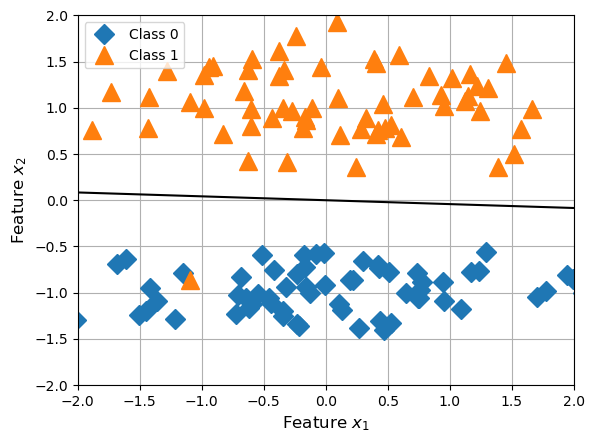

In [245]:
def plot_boundary(model):
    # Extract weights and bias from the model
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    # Compute the x2 values for the minimum and maximum x1 values
    x1_min = -20  # Define the minimum x1 value
    x2_min = (-(w1 * x1_min) - b) / w2  # Compute corresponding x2 value
    
    x1_max = 20  # Define the maximum x1 value
    x2_max = (-(w1 * x1_max) - b) / w2  # Compute corresponding x2 value
    
    # Return the boundary line coordinates
    return x1_min, x1_max, x2_min, x2_max

# Get decision boundary coordinates
x1_min, x1_max, x2_min, x2_max = plot_boundary(ppn)

# Plot data points for Class 0
plt.plot(
    features[targets == 0, 0],  # Feature x1 values for Class 0
    features[targets == 0, 1],  # Feature x2 values for Class 0
    marker="D",  # Diamond marker for Class 0
    markersize=10,
    linestyle="",
    label="Class 0",  # Label for the legend
)

# Plot data points for Class 1
plt.plot(
    features[targets == 1, 0],  # Feature x1 values for Class 1
    features[targets == 1, 1],  # Feature x2 values for Class 1
    marker="^",  # Triangle marker for Class 1
    markersize=13,
    linestyle="",
    label="Class 1",  # Label for the legend
)

# Plot the decision boundary line
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")  # Black line for boundary

# Add legend to the plot
plt.legend(loc=2)

# Set the x and y limits for the plot
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Label the axes
plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

# Add a grid for better visualization
plt.grid()

# Display the plot
plt.show()